<a href="https://colab.research.google.com/github/4nands/4nands.github.io/blob/main/Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

808


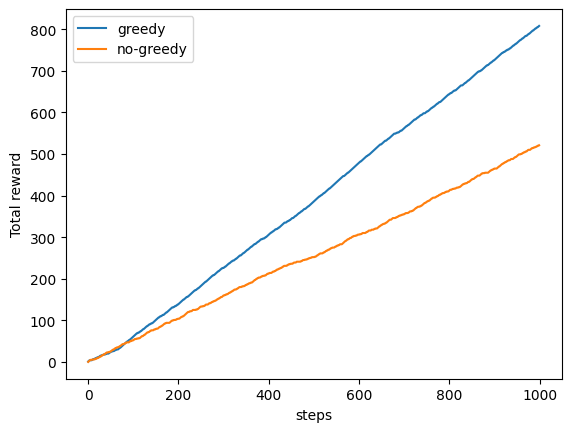

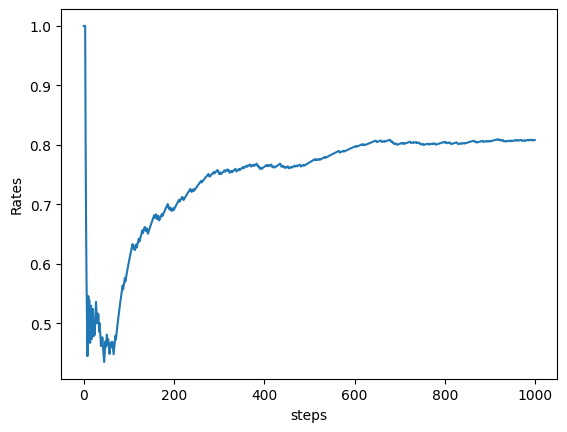

In [90]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:

  def __init__(self,arms=10):

    self.rates = np.random.rand(arms)

  def play(self,arm):

    return (self.rates[arm]> np.random.rand()).astype(int)


class Agent:

  def __init__(self,eps,action_size=10):

    self.eps = eps
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self,action,reward):

    self.ns[action] += 1
    self.Qs[action] += (reward-self.Qs[action]) / self.ns[action]

  def get_action(self):

    if np.random.rand() < self.eps:

      return np.random.randint(len(self.Qs))

    else:
      return np.argmax(self.Qs)


steps = 1000
eps = 0.1
M = 10

bandit = Bandit(arms=M)
agent = Agent(eps)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  action = agent.get_action()
  reward = bandit.play(action)
  agent.update(action,reward)
  total_reward += reward

  total_rewards += [total_reward]
  rates += [total_reward/(step+1)]

print(total_reward)


total_reward2 = 0
total_rewards2 = []

for step in range(steps):
  action = np.random.randint(M)
  total_reward2 += bandit.play(action)
  total_rewards2 += [total_reward2]



plt.ylabel('Total reward')
plt.xlabel('steps')
plt.plot(total_rewards,label='greedy')
plt.plot(total_rewards2,label='no-greedy')
plt.legend(loc='best')
plt.show()

plt.ylabel('Rates')
plt.xlabel('steps')
plt.plot(rates)
plt.show()



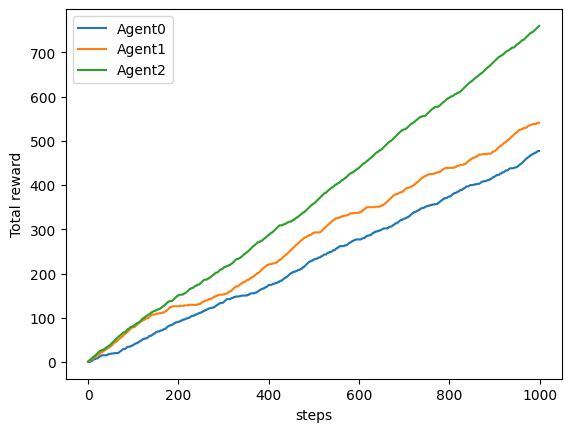

In [123]:
import numpy as np
import matplotlib.pyplot as plt

class NonStatBandit:

  def __init__(self,arms=10):

    self.arms = arms
    self.rates = np.random.rand(arms)

  def play(self,arm):

    rate = self.rates[arm]
    self.rates += 0.1*np.random.randn(self.arms)
    self.rates = np.clip(self.rates,0.0,1.0)

    return (rate > np.random.rand()).astype(int)


class Agent:

  def __init__(self,eps,action_size=10):

    self.eps = eps
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self,action,reward):

    self.ns[action] += 1
    self.Qs[action] += (reward-self.Qs[action]) / self.ns[action]

  def get_action(self):

    if np.random.rand() < self.eps:

      return np.random.randint(len(self.Qs))

    else:
      return np.argmax(self.Qs)

class AlphaAgent:

  def __init__(self,eps,alpha,action_size=10):

    self.eps = eps
    self.Qs = np.zeros(action_size)
    self.alpha = alpha

  def update(self,action,reward):

    self.Qs[action] += (reward-self.Qs[action]) *self.alpha

  def get_action(self):

    if np.random.rand() < self.eps:

      return np.random.randint(len(self.Qs))

    else:
      return np.argmax(self.Qs)

steps = 1000
M = 10

eps = 0.1
alpha = 0.3

np.random.seed(0)

bandit0 = NonStatBandit(arms=M)
bandit1 = NonStatBandit(arms=M)
bandit2 = NonStatBandit(arms=M)
agent1 = Agent(eps)
agent2 = AlphaAgent(eps,alpha)
total_reward0 = 0
total_rewards0 = []
total_reward1 = 0
total_rewards1 = []
total_reward2 = 0
total_rewards2 = []


for step in range(steps):
  action = np.random.randint(M)
  total_reward0 += bandit0.play(action)
  total_rewards0 += [total_reward0]



for step in range(steps):
  action = agent1.get_action()
  reward = bandit1.play(action)
  agent1.update(action,reward)
  total_reward1 += reward
  total_rewards1 += [total_reward1]

for step in range(steps):
  action = agent2.get_action()
  reward = bandit2.play(action)
  agent2.update(action,reward)
  total_reward2 += reward
  total_rewards2 += [total_reward2]


plt.ylabel('Total reward')
plt.xlabel('steps')
plt.plot(total_rewards0,label='Agent0')
plt.plot(total_rewards1,label='Agent1')
plt.plot(total_rewards2,label='Agent2')
plt.legend(loc='best')
plt.show()

